<a href="https://colab.research.google.com/github/RioDeMilo/Data-analysis-with-python-projects/blob/main/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

# Read data from file
df = pd.read_csv("./epa-sea-level.csv")


<div><section id="instructions">
<p>You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.</p>
<p>Use the data to complete the following tasks:</p>
<ul>
<li>Use Pandas to import the data from <code>epa-sea-level.csv</code>.</li>
<li>Use matplotlib to create a scatter plot using the <code>Year</code> column as the x-axis and the <code>CSIRO Adjusted Sea Level</code> column as the y-axis.</li>
<li>Use the <code>linregress</code> function from <code>scipy.stats</code> to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.</li>
<li>Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.</li>
<li>The x label should be <code>Year</code>, the y label should be <code>Sea Level (inches)</code>, and the title should be <code>Rise in Sea Level</code>.</li>
</ul>
<p>Unit tests are written for you under <code>test_module.py</code>.</p>
<p>The boilerplate also includes commands to save and return the image.</p>
<h2>Development</h2>
<p>For development, you can use <code>main.py</code> to test your functions. Click the "run" button and <code>main.py</code> will run.</p>
<h2>Testing</h2>
<p>We imported the tests from <code>test_module.py</code> to <code>main.py</code> for your convenience. The tests will run automatically whenever you hit the "run" button.</p>
<h2>Submitting</h2>
<p>Copy your project's URL and submit it to freeCodeCamp.</p>
<h2>Data Source</h2>
<p><a href="https://datahub.io/core/sea-level-rise" target="_blank" rel="noopener noreferrer nofollow">Global Average Absolute Sea Level Change</a>, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.</p>
</section></div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [36]:
df.set_index('Year')

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...
2009,8.586614,8.311024,8.862205,8.046354
2010,8.901575,8.618110,9.185039,8.122973
2011,8.964567,8.661417,9.267717,8.053065


In [54]:
# .set_index does not modify the original data frame only makes a copy
df


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [118]:
x = df["Year"] # we are setting the X axis for the scatterplot
y = df["CSIRO Adjusted Sea Level"] # the Y axis for the scatterplot
res = linregress(x,y)

In [115]:
# here we are setting the database for the line of best fit from 2000 to the max data available
dfs = df.set_index('Year') # setting the Year ass a index
dfs = dfs.loc[2000:2013] # slicing the data for a new line
xs = dfs.index # calling the X as the year for the plot
ys = dfs['CSIRO Adjusted Sea Level'] # setting the Y axis as the sea level for the new line

In [116]:
S_res = linregress(xs,ys) # this is the new line with the sliced data

In [4]:
# i added the range for X and Y to 2050 for the regression line
New_year= np.arange(1880,2051)

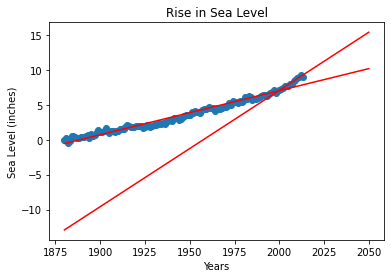

In [123]:
plt.scatter(x, y) # calling the scatter plot
res = linregress(x, y) # setting a linear regression with the same values 
plt.plot(New_year, res.intercept + res.slope*New_year, 'r', label='fitted line') # the regression line with all the values of the data base
plt.plot(New_year, S_res.intercept + S_res.slope*New_year, 'r', label='fitted line') # the regression line with a specified sliced date
plt.title("Rise in Sea Level")
plt.xlabel("Years")
plt.ylabel("Sea Level (inches)")

plt.show()

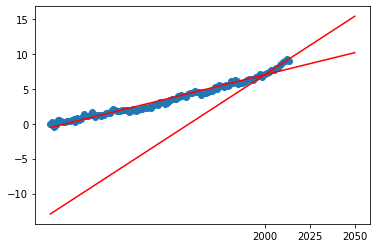

In [120]:
plt.plot(x, y, 'o', label='original data')
plt.plot(New_year, res.intercept + res.slope*New_year, 'r', label='fitted line')
plt.plot(New_year, S_res.intercept + S_res.slope*New_year, 'r', label='fitted line')
plt.xticks(range(2000, 2051,25))

plt.show()

In [79]:
dfs = df.set_index('Year')

In [81]:
dfs.loc[2000:2013] # here i'm confirming that the data is corrrected 

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
2000,7.062992,6.791339,7.334646,6.920582
2001,7.287402,7.019685,7.555118,7.087460
2002,7.381890,7.110236,7.653543,7.319698
2003,7.759843,7.484252,8.035433,7.488353
2004,7.740157,7.464567,8.015748,7.507933
2005,7.744094,7.472441,8.015748,7.644563
2006,7.917323,7.645669,8.188976,7.697420
2007,7.996063,7.712598,8.279528,7.702147
2008,8.350394,8.078740,8.622047,7.907365


In [108]:
S_res , res # here i'm confirming that the two lines are different
res != S_res # also we can confirm that this two values are different by comparing them

True

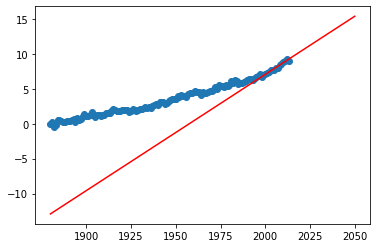

In [106]:
plt.plot(x, y, 'o', label='original data')
plt.plot(New_year, S_res.intercept + S_res.slope*New_year, 'r', label='fitted line')
plt.xticks(range(1900, 2051,25))

plt.show()

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv("./epa-sea-level.csv")
    # i added the range for X and Y to 2050 for the regression line
    New_year= np.arange(1880,2051)

    # Create scatter plot
    x = df["Year"]
    y = df["CSIRO Adjusted Sea Level"]
    plt.scatter(x, y)
    


    # Create first line of best fit
    res = linregress(x,y)
    
    plt.plot(New_year, res.intercept + res.slope * New_year, 'r', label='fitted line')
    plt.xticks(range(1900, 2051, 25)) # the values of the X axis that are going to be showed

  


    # Create second line of best fit
    # here we are setting the database for the line of best fit from 2000 to the max data available
    dfs = df.set_index('Year') # setting the Year ass a index
    dfs = dfs.loc[2000:2013] # slicing the data for a new line
    xs = dfs.index # calling the X as the year for the plot
    ys = dfs['CSIRO Adjusted Sea Level'] # setting the Y axis as the sea level for the new line
    S_res = linregress(xs,ys) # this is the new line with the sliced data
    plt.plot(New_year, S_res.intercept + S_res.slope*New_year, 'r', label='fitted line')
    plt.title("Rise in Sea Level")
    plt.xlabel("Years")
    plt.ylabel("Sea Level (inches)")


    # Add labels and title

    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()